In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers,models,layers,Model
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
#import tensorflow.keras.applications
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import tf_slim as slim
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray

import matplotlib.image as mpimg
from PIL import Image
import cv2
#from nets import nasnet
import plotly.offline as py
import plotly.express as px
import tensorflow as tf

In [2]:
print(tf.test.is_built_with_cuda()) 

True


In [3]:
%config IPCompleter.greedy=True

In [ ]:
from numba import jit,njit

In [3]:
from natsort import natsorted, ns
from skimage import io
list_covid_test = os.listdir('D:/Dataset/CovidXrayImage/Data/test/COVID19')
list_normal_test = os.listdir('D:/Dataset/CovidXrayImage/Data/test/NORMAL')
list_pneumonia_test = os.listdir('D:/Dataset/CovidXrayImage/Data/test/PNEUMONIA')
list_covid_train = os.listdir('D:/Dataset/CovidXrayImage/Data/train/COVID19')
list_normal_train = os.listdir('D:/Dataset/CovidXrayImage/Data/train/NORMAL')
list_pneumonia_train = os.listdir('D:/Dataset/CovidXrayImage/Data/train/PNEUMONIA')

In [4]:
covid_images_test = []
for filename in list_covid_test:
    img = (io.imread('D:/Dataset/CovidXrayImage/Data/test/COVID19/' + filename))
    covid_images_test.append(img)

In [5]:
normal_images_test = []
for filename in list_normal_test:
    img = (io.imread('D:/Dataset/CovidXrayImage/Data/test/NORMAL/' + filename))
    normal_images_test.append(img)

In [6]:
pneumonia_images_test = []
for filename in list_pneumonia_test:
    img = (io.imread('D:/Dataset/CovidXrayImage/Data/test/PNEUMONIA/' + filename))
    pneumonia_images_test.append(img)

In [7]:
covid_images_train = []
for filename in list_covid_train:
    img = (io.imread('D:/Dataset/CovidXrayImage/Data/train/COVID19/' + filename))
    covid_images_train.append(img)

In [8]:
normal_images_train = []
for filename in list_normal_train:
    img = (io.imread('D:/Dataset/CovidXrayImage/Data/train/NORMAL/' + filename))
    normal_images_train.append(img)

In [9]:
pneumonia_images_train = []
for filename in list_pneumonia_train:
    img = (io.imread('D:/Dataset/CovidXrayImage/Data/train/PNEUMONIA/' + filename))
    pneumonia_images_train.append(img)

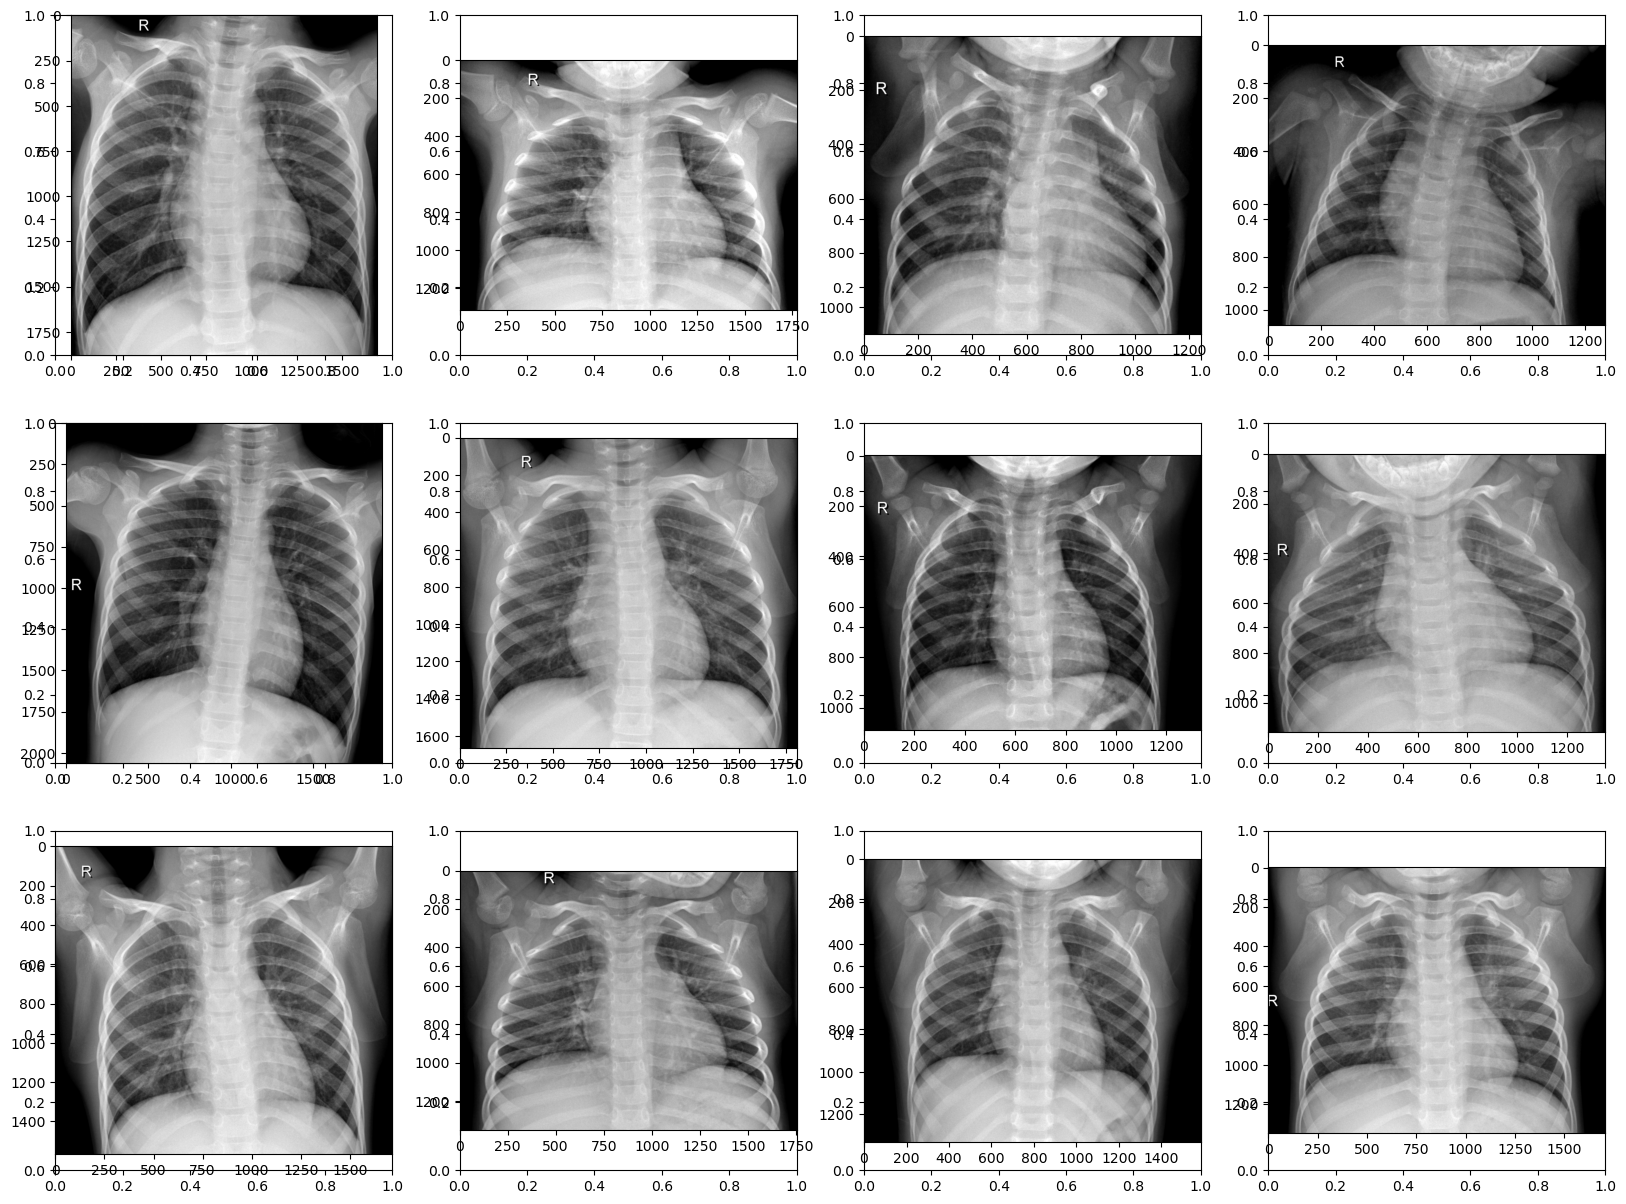

In [10]:
i = 1
fig, ax = plt.subplots(3,4,figsize=(20, 15))
for im in normal_images_test[:12]:
    fig.add_subplot(3,4, i)
    plt.imshow(im,cmap="gray")
    i = i+1

In [ ]:
histogram = cv2.calcHist(covid_images_test[80], [0], None, [256], [0, 256])
histogram2 = cv2.calcHist(covid_images_test[18], [0], None, [256], [0, 256])
plt.plot(histogram, color='k')
plt.show()

In [ ]:
img_normalized = cv2.normalize(covid_images_test[80], None, 0, 0.5,
cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [ ]:
plt.plot(histogram, color='r')
plt.plot(histogram2, color='k')
plt.show()

In [ ]:
img_blur_covid = cv2.blur(src=covid_images_test[17], ksize=(5,5))

In [ ]:
gaussian_blur_covid = cv2.GaussianBlur(src = covid_images_test[17], ksize=(5,5),sigmaX=0, sigmaY=0)

In [ ]:
denoise2_covid = cv2.fastNlMeansDenoising(covid_images_test[17],None,10,10)

In [ ]:
equ_covid = cv2.equalizeHist(covid_images_test[17])

In [ ]:
clahe = cv2.createCLAHE(clipLimit=10.2, tileGridSize=(8, 8))
equalized_covid = clahe.apply(covid_images_test[17])

In [ ]:
type(equalized_covid)

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(2,3, 1)
plt.xlabel('Covid Image Without Filter')
plt.imshow(covid_images_test[17], cmap="gray")
plt.subplot(2,3, 2)
plt.xlabel('img_Blur')
plt.imshow(img_blur_covid, cmap="gray")
plt.subplot(2,3, 3)
plt.xlabel('Gaussian_Blur')
plt.imshow(gaussian_blur_covid, cmap="gray")
plt.subplot(2,3, 4)
plt.xlabel('Denoised Image')
plt.imshow(denoise2_covid, cmap="gray")
plt.subplot(2,3, 5)
plt.xlabel('Equalized Image')
plt.imshow(equ_covid, cmap="gray")
plt.subplot(2,3, 6)
plt.xlabel('Equalized Image')
plt.imshow(equalized_covid, cmap="gray")

In [ ]:
clahe = cv2.createCLAHE(clipLimit=10.2, tileGridSize=(8, 8))
equalized_normal1 = clahe.apply(normal_images_test[21])
equalized_normal2 = clahe.apply(normal_images_test[13])
equalized_normal3 = clahe.apply(normal_images_test[4])

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(1,3, 1)
plt.xlabel('Equalized Normal Image')
plt.imshow(equalized_normal1, cmap="gray")
plt.subplot(1,3, 2)
plt.xlabel('Equalized Normal Image')
plt.imshow(equalized_normal2, cmap="gray")
plt.subplot(1,3, 3)
plt.xlabel('Equalized Normal Image')
plt.imshow(equalized_normal3, cmap="gray")

In [ ]:
th, dst1 = cv2.threshold(covid_images_test[17],110, 255, cv2.THRESH_BINARY); 

th, dst2 = cv2.threshold(covid_images_test[17], 110, 128, cv2.THRESH_BINARY); 

th, dst3 = cv2.threshold(covid_images_test[17],127,255, cv2.THRESH_BINARY); 

th, dst4 = cv2.threshold(covid_images_test[17],127,255, cv2.THRESH_BINARY_INV); 

th, dst5 = cv2.threshold(covid_images_test[17],127,255, cv2.THRESH_TRUNC); 

th, dst6 = cv2.threshold(covid_images_test[17],127,255, cv2.THRESH_TOZERO); 

th, dst7 = cv2.threshold(covid_images_test[17],127,255, cv2.THRESH_TOZERO_INV); 


In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2,4, 1)
plt.xlabel('Normal Image')
plt.imshow(covid_images_test[17], cmap="gray")
plt.subplot(2,4, 2)
plt.xlabel('110, 255 THRESH_BINARY')
plt.imshow(dst1, cmap="gray")
plt.subplot(2,4, 3)
plt.xlabel('110, 128 THRESH_BINARY')
plt.imshow(dst2, cmap="gray")
plt.subplot(2,4, 4)
plt.xlabel('127, 155 THRESH_BINARY')
plt.imshow(dst3, cmap="gray")
plt.subplot(2,4, 5)
plt.xlabel('THRESH_BINARY_INV')
plt.imshow(dst4, cmap="gray")
plt.subplot(2,4, 6)
plt.xlabel('THRESH_TRUNC')
plt.imshow(dst5, cmap="gray")
plt.subplot(2,4, 7)
plt.xlabel('THRESH_TOZERO')
plt.imshow(dst6, cmap="gray")
plt.subplot(2,4, 8)
plt.xlabel('THRESH_TOZERO_INV')
plt.imshow(dst7, cmap="gray")

In [ ]:
clahe = cv2.createCLAHE(clipLimit=0.8, tileGridSize=(8, 8))
equalized_thresh = clahe.apply(dst3)

In [ ]:
plt.imshow(equalized_thresh, cmap="gray")

In [ ]:
th, dst1_pneu = cv2.threshold(pneumonia_images_test[370],110, 255, cv2.THRESH_BINARY); 
th, dst2_pneu = cv2.threshold(pneumonia_images_test[370],127,255, cv2.THRESH_BINARY_INV); 
th, dst3_pneu = cv2.threshold(pneumonia_images_test[370],127,255, cv2.THRESH_TRUNC); 

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,3, 1)
plt.xlabel('Pneumonia Image THRESH_BINARY ')
plt.imshow(dst1_pneu, cmap="gray")
plt.subplot(1,3, 2)
plt.xlabel('Pneumonia Image (127, 255) THRESH_BINARY')
plt.imshow(dst2_pneu, cmap="gray")
plt.subplot(1,3, 3)
plt.xlabel('Pneumonia Image (127,255) THRESH_TRUNC')
plt.imshow(dst3_pneu, cmap="gray")

In [ ]:
th, dst1_normal = cv2.threshold(normal_images_test[15],110, 255, cv2.THRESH_BINARY); 
th, dst4_normal = cv2.threshold(normal_images_test[15],127,255, cv2.THRESH_BINARY_INV); 
th, dst5_normal = cv2.threshold(normal_images_test[15],127,255, cv2.THRESH_TRUNC); 

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2,3, 1)
plt.xlabel('Covid Image THRESH_BINARY ')
plt.imshow(dst1, cmap="gray")
plt.subplot(2,3, 2)
plt.xlabel('Covid Image (127, 255) THRESH_BINARY')
plt.imshow(dst4, cmap="gray")
plt.subplot(2,3, 3)
plt.xlabel('Covid Image (127,255) THRESH_TRUNC')
plt.imshow(dst5, cmap="gray")
plt.subplot(2,3, 4)
plt.xlabel('Normal Image (110, 255) THRESH_BINARY')
plt.imshow(dst1_normal, cmap="gray")
plt.subplot(2,3, 5)
plt.xlabel('Normal Image (127, 255) THRESH_BINARY_INV')
plt.imshow(dst4_normal, cmap="gray")
plt.subplot(2,3, 6)
plt.xlabel('Normal Image (127, 255) THRESH_TRUNC')
plt.imshow(dst5_normal, cmap="gray")

In [ ]:
sharpen_filter=np.array([[-1,-1,-1],
                 [-1,8.2,-1],
                [-1,-1,-1]])
# applying kernels to the input image to get the sharpened image

sharp_image_covid = cv2.filter2D(covid_images_test[17],-1,sharpen_filter)

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
plt.xlabel('sharp_image_covid ')
plt.imshow(sharp_image_covid, cmap="gray")

In [ ]:
kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
  
# Sharpen the image
sharpened_image2 = cv2.filter2D(covid_images_test[17], -1, kernel_sharp)
plt.rcParams["figure.figsize"] = (10,8)
plt.xlabel('sharpened_image2covid ')
plt.imshow(sharpened_image2, cmap="gray")

In [ ]:
sharpened_image_covid_lap = cv2.Laplacian(covid_images_test[17], cv2.CV_64F)

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plt.xlabel('sharpened_image_covid_lap')
plt.imshow(sharpened_image_covid_lap, cmap="gray")

In [ ]:
def canny_edge_detection(image):
    blurred = cv2.GaussianBlur(src=image, ksize=(3, 5), sigmaX=1.15)
    
    edges = cv2.Canny(blurred, 15, 70)
      
    return edges

In [ ]:
covid_edges = canny_edge_detection(covid_images_test[17])
normal_edges = canny_edge_detection(normal_images_test[10])

In [ ]:
type(normal_images_test[11])

In [ ]:
io.imshow(covid_edges)

In [ ]:
#plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2, 1)
plt.xlabel('Covid Image Edges')
plt.imshow(covid_edges, cmap="gray")
plt.subplot(1,2, 2)
plt.xlabel('Normal Image Edges')
plt.imshow(normal_edges, cmap="gray")

In [32]:
def preprocess_im(list_im,path_read,path_write):
        #clahe = cv2.createCLAHE(clipLimit=10.2, tileGridSize=(8, 8))
        for im in list_im:
            img = io.imread(path_read + im)
            if img.ndim == 2:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))    
            dt,thresh = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
            gaussian_blur = cv2.GaussianBlur(src = thresh, ksize=(5,5),sigmaX=0, sigmaY=0)
            cv2.imwrite(path_write+im,gaussian_blur)
        

In [33]:
preprocess_im(list_normal_test,'D:/Dataset/CovidXrayImage/Data/test/NORMAL/',"D:/Dataset/covid_xray/test/normal/")

In [34]:
preprocess_im(list_covid_test,'D:/Dataset/CovidXrayImage/Data/test/COVID19/',"D:/Dataset/covid_xray/test/covid/")


In [35]:
preprocess_im(list_pneumonia_test,'D:/Dataset/CovidXrayImage/Data/test/PNEUMONIA/',"D:/Dataset/covid_xray/test/pneumonia/")

In [36]:
preprocess_im(list_normal_train,'D:/Dataset/CovidXrayImage/Data/train/NORMAL/',"D:/Dataset/covid_xray/train/normal/")

In [37]:
preprocess_im(list_covid_train,'D:/Dataset/CovidXrayImage/Data/train/COVID19/',"D:/Dataset/covid_xray/train/covid/")

In [38]:
preprocess_im(list_pneumonia_train,'D:/Dataset/CovidXrayImage/Data/train/PNEUMONIA/',"D:/Dataset/covid_xray/train/pneumonia/")

In [3]:
t = 0

for image in os.listdir("D:/Dataset/covid_xray/train/normal"):
    img = io.imread("D:/Dataset/covid_xray/train/normal/"+ image)
    if img.shape[2] != 3 :
        t = t + 1
print(t)        

NameError: name 'io' is not defined

In [41]:
img20 = io.imread("D:/Dataset/covid_xray/test/pneumonia/PNEUMONIA(3458).jpg")

In [42]:
img20.shape

(624, 1112, 3)

In [30]:
img20 = img20.reshape((1, img20.shape[0], img20.shape[1], img20.shape[2]))

In [31]:
img20

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 254, 254],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [254, 254, 254]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [88]:
train_dir = "D:/Dataset/CovidXrayImage/Data/train"
test_dir = "D:/Dataset/CovidXrayImage/Data/test"
#train_dir = "D:/Dataset/covid_xray/train"
#test_dir = "D:/Dataset/covid_xray/test"

In [89]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.5,
    height_shift_range=0.2,
    shear_range=0.4,
    zoom_range=0.2,
    
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(       
        train_dir,        
        target_size=(224, 224),
        batch_size=16,
        subset= 'training',
        class_mode='categorical'
        )

val_generator = test_datagen.flow_from_directory(
     test_dir,
     target_size = (224, 224),
     batch_size = 16,
     #subset= 'validation',
     class_mode='categorical' 
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [14]:
model = ResNet50(include_top=False , weights ='imagenet' , input_shape=None)


Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5: 403 -- Forbidden

In [69]:
vgg_model = VGG16(include_top = False, weights = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape = (224,224,3))

In [70]:
vgg_model.trainable = False

In [85]:
model = Sequential()
model.add(vgg_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [79]:

x = layers.Flatten()(vgg_model.output)
x = layers.Dense(1024, activation='relu')(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(vgg_model.input, x)


In [86]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
model.fit(
          train_generator,
          validation_data = val_generator,
          epochs=10,
          #shuffle=True
             )

Epoch 1/10
322/322 [==============================] - 150s 465ms/step - loss: 0.3824 - acc: 0.7214 - val_loss: 0.3186 - val_acc: 0.7958
Epoch 2/10
322/322 [==============================] - 121s 374ms/step - loss: 0.3169 - acc: 0.7811 - val_loss: 0.2766 - val_acc: 0.8214
Epoch 3/10
322/322 [==============================] - 121s 375ms/step - loss: 0.2920 - acc: 0.8000 - val_loss: 0.2517 - val_acc: 0.8354
Epoch 4/10
322/322 [==============================] - 123s 382ms/step - loss: 0.2686 - acc: 0.8280 - val_loss: 0.2371 - val_acc: 0.8478
Epoch 5/10
322/322 [==============================] - 118s 366ms/step - loss: 0.2614 - acc: 0.8295 - val_loss: 0.2464 - val_acc: 0.8494
Epoch 6/10
322/322 [==============================] - 118s 365ms/step - loss: 0.2503 - acc: 0.8416 - val_loss: 0.2475 - val_acc: 0.8494
Epoch 7/10
322/322 [==============================] - 117s 364ms/step - loss: 0.2367 - acc: 0.8542 - val_loss: 0.2183 - val_acc: 0.8571
Epoch 8/10
322/322 [============================